In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
sns.set_theme(style="ticks", color_codes=True)
from tqdm.notebook import tqdm, trange
import time
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
drive.mount('/content/drive')
main_201805 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201805.csv')
main_201806 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201806.csv')
main_201807 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201807.csv')
main_201808 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201808.csv')
main_201809 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201809.csv')
main_201810 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201810.csv')
main_201811 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201811.csv')
main_201812 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201812.csv')
main_201801 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201801.csv')
main_201802 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201802.csv')
main_201803 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201803.csv')
main_201804 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201804.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
main_201905 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201905.csv')
main_201906 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201906.csv')
main_201907 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201907.csv')
main_201908 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201908.csv')
main_201909 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201909.csv')
main_201910 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201910.csv')
main_201911 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201911.csv')
main_201912 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201912.csv')
main_201901 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201901.csv')
main_201902 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201902.csv')
main_201903 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201903.csv')
main_201904 = pd.read_csv('/content/drive/My Drive/DA/臺北捷運每日分時各站OD流量統計資料_201904.csv')

# Initial Processing

In [6]:
#Get rid of the [進站] column
all_data = [main_201801,main_201802,main_201803,main_201804,main_201805,
             main_201806,main_201807,main_201808,main_201809,main_201810,main_201811,main_201812,\
           main_201901,main_201902,main_201903,main_201904,main_201905,
             main_201906,main_201907,main_201908,main_201909,main_201910,main_201911,main_201912]
cleaned_all_data = []

for data in all_data:
    cleaned_all_data.append(data.groupby(['日期','時段','出站']).sum().reset_index())

full_year_data = pd.concat(cleaned_all_data)
full_year_data['日期'] = pd.to_datetime(full_year_data['日期'])

In [7]:
full_year_data.rename(columns = {'日期': 'Date', '時段': 'Hour', '出站':'Station','人次':'CrowdFlow'}, inplace = True)
full_year_data = full_year_data.reset_index()
full_year_data = full_year_data.drop(['index'],axis=1)

In [12]:
full_year_data

,Date,Hour,Station,CrowdFlow
0,2018-01-01,0,BL板橋,199
1,2018-01-01,0,七張,148
2,2018-01-01,0,三和國中,179
3,2018-01-01,0,三民高中,177
4,2018-01-01,0,三重,43
...,...,...,...,...
1656283,2020-01-01,5,頂埔,87
1656284,2020-01-01,5,頂溪,299
1656285,2020-01-01,5,頭前庄,40
1656286,2020-01-01,5,麟光,35


# EDA

In [13]:
ppl_every_day = full_year_data.groupby(['Date']).sum().reset_index().drop(['Hour'],axis=1)
ppl_every_day

,Date,CrowdFlow
0,2018-01-01,1716811
1,2018-01-02,2143920
2,2018-01-03,2170179
3,2018-01-04,2179256
4,2018-01-05,2388112
...,...,...
726,2019-12-28,2296395
727,2019-12-29,1775710
728,2019-12-30,2467977
729,2019-12-31,3058226


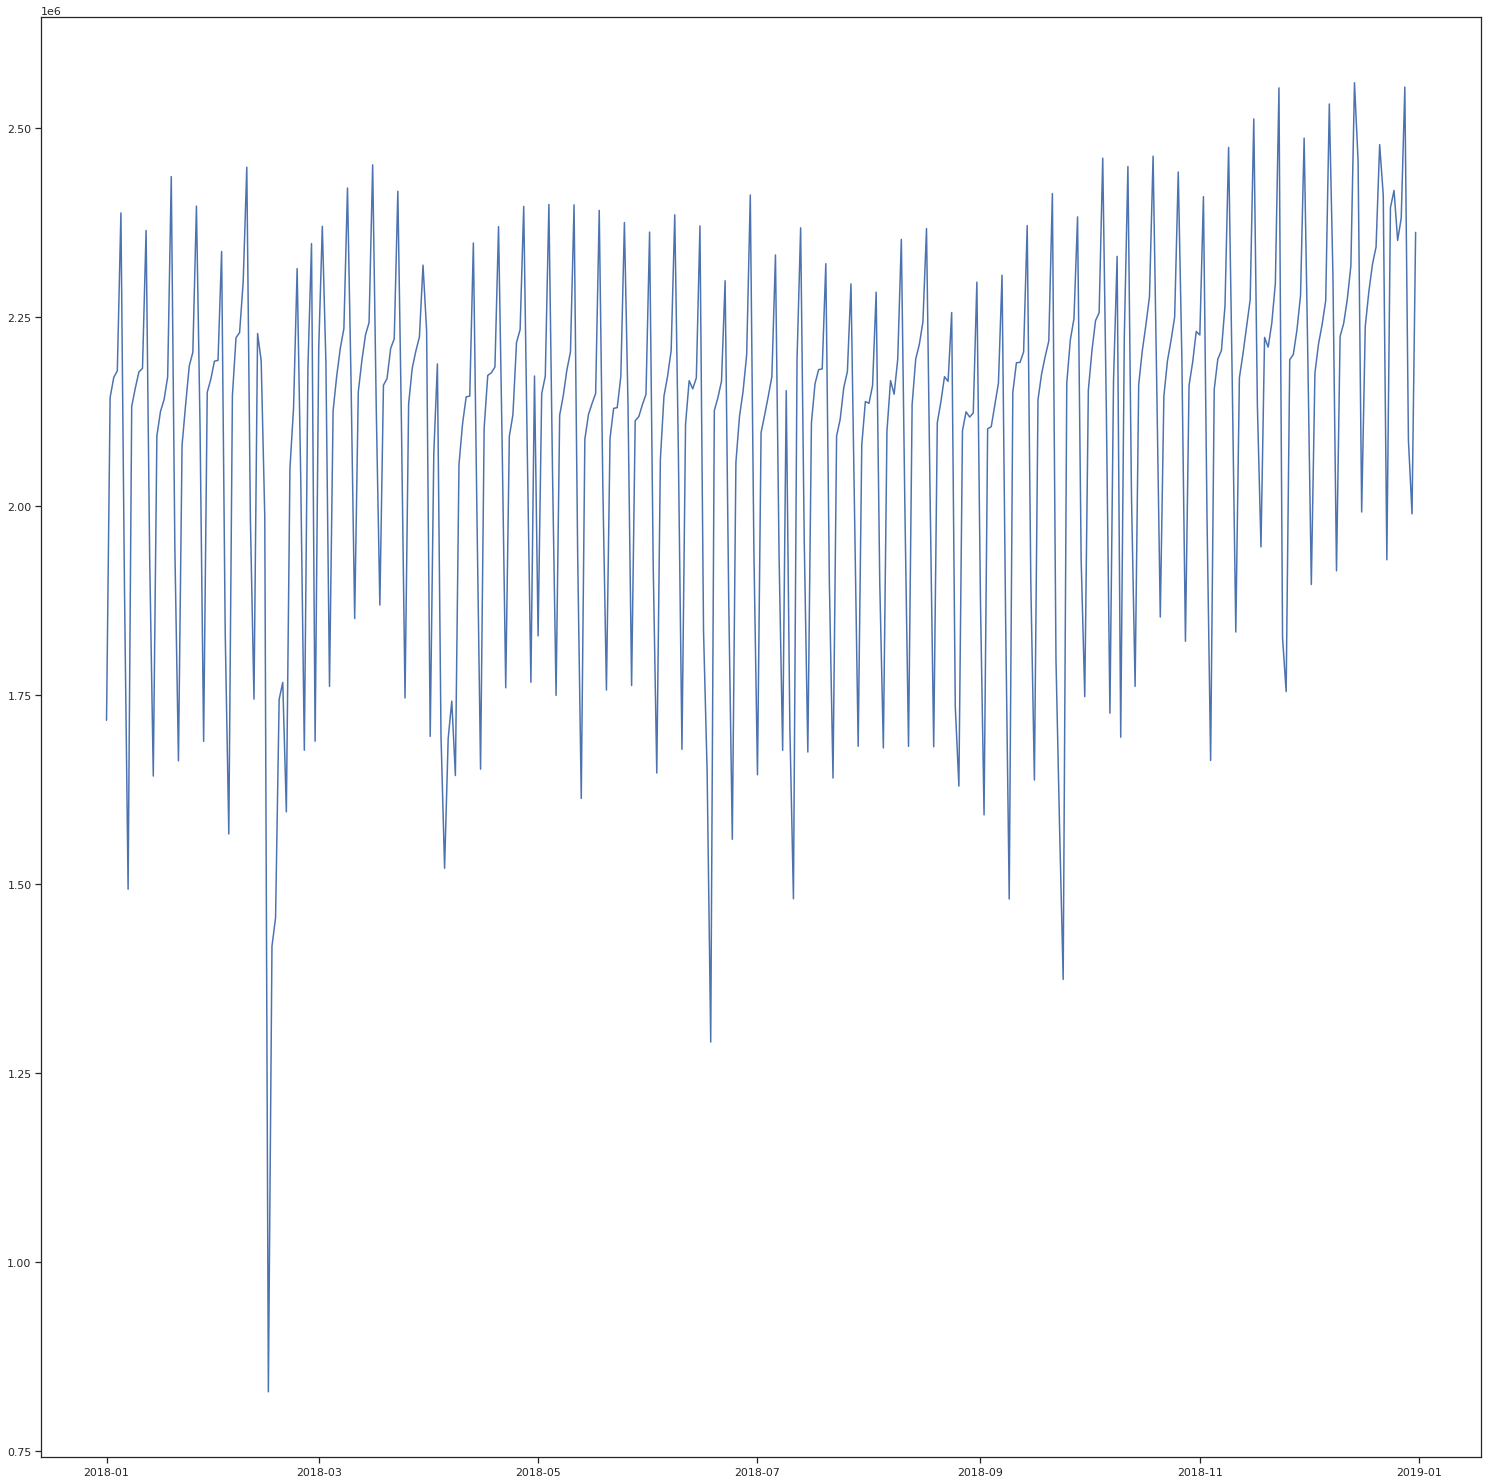

In [14]:
#2018 crowd flow

ppl_every_day = full_year_data.groupby(['Date']).sum().reset_index().drop(['Hour'],axis=1)

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(ppl_every_day['Date'][:365], ppl_every_day['CrowdFlow'][:365])
plt.show()

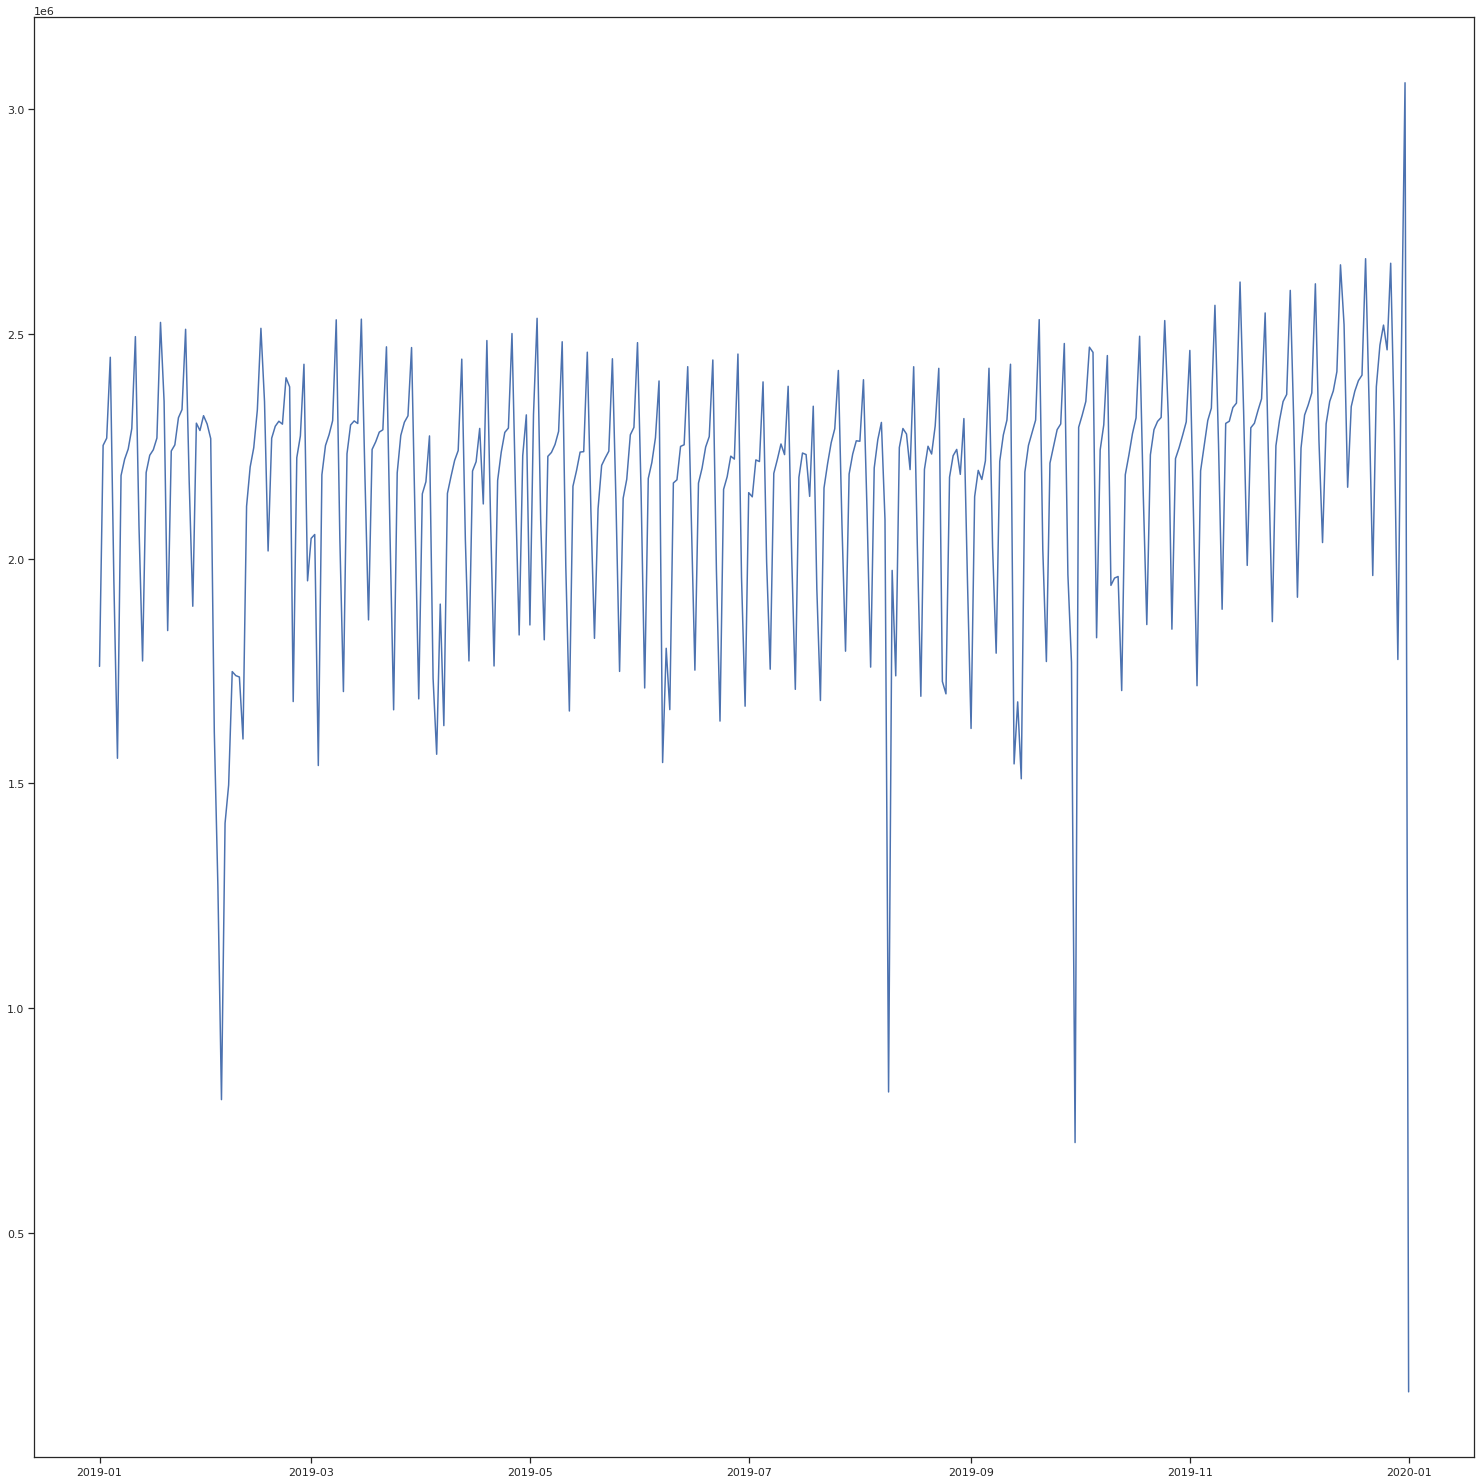

In [15]:
#2019 crowd flow

fig = plt.figure(figsize=(20,20))
ax1 = fig.add_axes([0,0,1,1])
ax1.plot(ppl_every_day['Date'][365:], ppl_every_day['CrowdFlow'][365:])
plt.show()

In [16]:
#2019-08-09 major hurricane struck Taiwan, MRT stopped
#2019-09-30 anamaly
#2020-01-01 anamaly
#Drop all three days

full_year_data = full_year_data[full_year_data.Date != '2019-08-09']
full_year_data = full_year_data[full_year_data.Date != '2019-09-30']
full_year_data = full_year_data[full_year_data.Date != '2020-01-01']

In [17]:
ppl_every_day.describe()

,CrowdFlow
count,7.310000e+02
mean,2.125546e+06
std,2.778685e+05
min,1.470910e+05
25%,2.026038e+06
50%,2.187409e+06
75%,2.289948e+06
max,3.058226e+06


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 26495 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 27211 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19971 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21644 missing from current font.
  font.set_

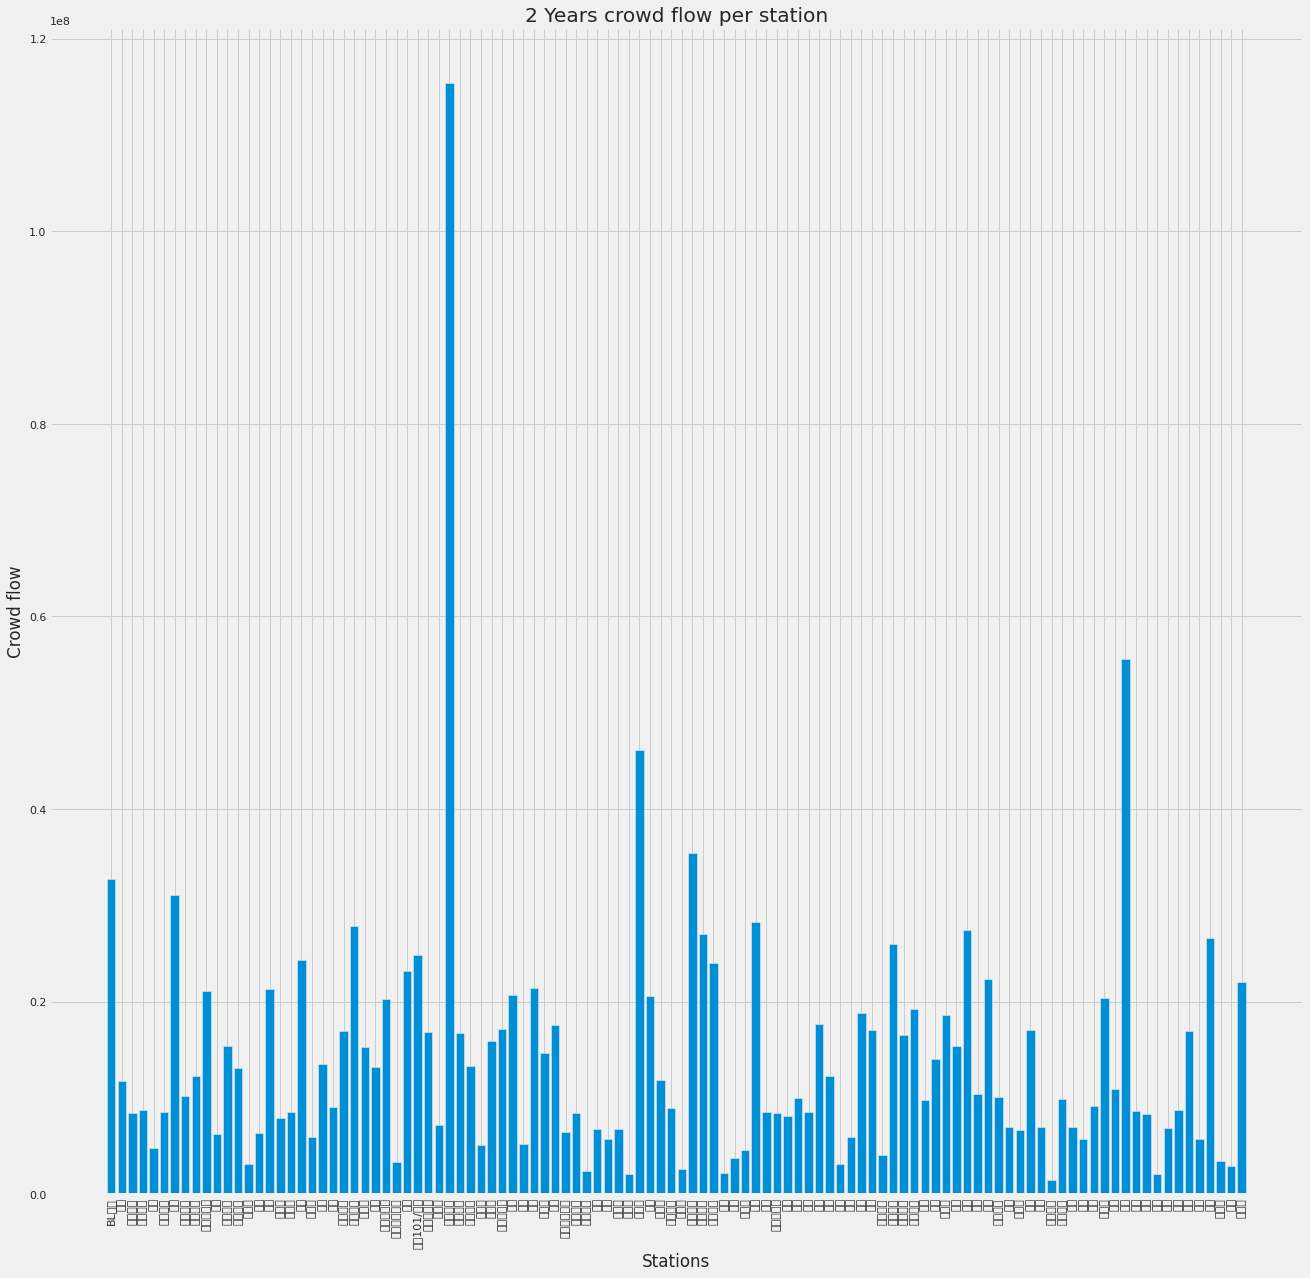

In [18]:
ppl_per_station = full_year_data.groupby(['Station']).sum().reset_index().drop(['Hour'],axis=1)
flow = ppl_per_station['CrowdFlow'].tolist()

%matplotlib inline
plt.style.use('fivethirtyeight')
f, ax = plt.subplots(figsize=(20,20)) # set the size that you'd like (width, height)
x_values = list(range(len(flow)))
plt.bar(x_values, flow, orientation = 'vertical')
station_list = ppl_per_station['Station'].tolist()
plt.xticks(x_values, station_list, rotation='vertical')
plt.ylabel('Crowd flow'); plt.xlabel('Stations'); plt.title('2 Years crowd flow per station');

In [19]:
station_ranking = ppl_per_station.sort_values(by=['CrowdFlow'],ascending=False)
station_ranking = station_ranking.reset_index().drop(['index'],axis=1)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(station_ranking)

      Station  CrowdFlow
0        台北車站  115403187
1          西門   55571851
2         市政府   46143711
3        忠孝復興   35406542
4        BL板橋   32715997
5          中山   31106216
6          新埔   28293254
7        南京復興   27848197
8          淡水   27469867
9        忠孝敦化   27045323
10         頂溪   26616726
11       松江南京   25944328
12   台北101/世貿   24795731
13         劍潭   24364179
14       忠孝新生   24024207
15         古亭   23121343
16         石牌   22306251
17        龍山寺   22000515
18         士林   21390908
19         公館   21279228
20      中正紀念堂   21103537
21         圓山   20702694
22         府中   20624284
23        行天宮   20348914
24      南港展覽館   20226278
25       永安市場   19241409
26         東門   18809388
27        江子翠   18553737
28         景安   17653678
29         大安   17556093
30      國父紀念館   17119158
31         芝山   17088081
32         松山   17042450
33       南京三民   16899409
34         雙連   16895173
35      台北小巨蛋   16845272
36       台大醫院   16773297
37       民權西路   16493326
38        善導寺   15893648


# Feature Engineering

In [20]:
full_year_data['DayofWeek'] = full_year_data['Date'].dt.dayofweek + 1
full_year_data['Month'] = full_year_data['Date'].dt.month
full_year_data['Special'] = 1

In [21]:
full_year_data['Special'] = 1

full_year_data['Special'].loc[full_year_data['Date'] == '2018-05-01'] = 0 #勞動節
full_year_data['Special'].loc[full_year_data['Date'] == '2018-06-16'] = 0 #端午節
full_year_data['Special'].loc[full_year_data['Date'] == '2018-06-17'] = 0 #端午節
full_year_data['Special'].loc[full_year_data['Date'] == '2018-06-18'] = 0 #端午節
full_year_data['Special'].loc[full_year_data['Date'] == '2018-09-22'] = 0 #中秋節
full_year_data['Special'].loc[full_year_data['Date'] == '2018-09-23'] = 0 #中秋節
full_year_data['Special'].loc[full_year_data['Date'] == '2018-09-24'] = 0 #中秋節
full_year_data['Special'].loc[full_year_data['Date'] == '2018-10-10'] = 0 #國慶日
full_year_data['Special'].loc[full_year_data['Date'] == '2018-01-01'] = 0 #元旦
full_year_data['Special'].loc[full_year_data['Date'] == '2018-02-15'] = 0 #除夕
full_year_data['Special'].loc[full_year_data['Date'] == '2018-02-16'] = 0 #初一
full_year_data['Special'].loc[full_year_data['Date'] == '2018-02-17'] = 0 #回娘家
full_year_data['Special'].loc[full_year_data['Date'] == '2018-02-18'] = 0 #祭祖
full_year_data['Special'].loc[full_year_data['Date'] == '2018-02-19'] = 0 #迎神
full_year_data['Special'].loc[full_year_data['Date'] == '2018-02-20'] = 0 #開工
full_year_data['Special'].loc[full_year_data['Date'] == '2018-02-28'] = 0 #228
full_year_data['Special'].loc[full_year_data['Date'] == '2018-04-04'] = 0 #掃墓
full_year_data['Special'].loc[full_year_data['Date'] == '2018-04-05'] = 0 #掃墓
full_year_data['Special'].loc[full_year_data['Date'] == '2018-04-06'] = 0 #補假

full_year_data['Special'].loc[full_year_data['Date'] == '2018-03-31'] = 2 #清明連假補班
full_year_data['Special'].loc[full_year_data['Date'] == '2018-12-22'] = 2 #補班

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [22]:
full_year_data['Special'].loc[full_year_data['Date'] == '2019-05-01'] = 0 #勞動節
full_year_data['Special'].loc[full_year_data['Date'] == '2019-06-07'] = 0 #端午節
full_year_data['Special'].loc[full_year_data['Date'] == '2019-09-13'] = 0 #中秋節
full_year_data['Special'].loc[full_year_data['Date'] == '2019-10-10'] = 0 #國慶日
full_year_data['Special'].loc[full_year_data['Date'] == '2019-10-11'] = 0 #國慶日
full_year_data['Special'].loc[full_year_data['Date'] == '2019-01-01'] = 0 #元旦
full_year_data['Special'].loc[full_year_data['Date'] == '2019-02-02'] = 0 #除夕
full_year_data['Special'].loc[full_year_data['Date'] == '2019-02-03'] = 0 #初一
full_year_data['Special'].loc[full_year_data['Date'] == '2019-02-04'] = 0 #回娘家
full_year_data['Special'].loc[full_year_data['Date'] == '2019-02-05'] = 0 #祭祖
full_year_data['Special'].loc[full_year_data['Date'] == '2019-02-06'] = 0 #迎神
full_year_data['Special'].loc[full_year_data['Date'] == '2019-02-07'] = 0 #開工
full_year_data['Special'].loc[full_year_data['Date'] == '2019-02-08'] = 0 #開工
full_year_data['Special'].loc[full_year_data['Date'] == '2019-02-28'] = 0 #228
full_year_data['Special'].loc[full_year_data['Date'] == '2019-04-04'] = 0 #掃墓
full_year_data['Special'].loc[full_year_data['Date'] == '2019-04-05'] = 0 #掃墓

full_year_data['Special'].loc[full_year_data['Date'] == '2019-10-05'] = 2 #補班
full_year_data['Special'].loc[full_year_data['Date'] == '2019-02-23'] = 2 #補班

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [23]:
tidy_full_data = full_year_data
tidy_full_data

,Date,Hour,Station,CrowdFlow,DayofWeek,Month,Special
0,2018-01-01,0,BL板橋,199,1,1,0
1,2018-01-01,0,七張,148,1,1,0
2,2018-01-01,0,三和國中,179,1,1,0
3,2018-01-01,0,三民高中,177,1,1,0
4,2018-01-01,0,三重,43,1,1,0
...,...,...,...,...,...,...,...
1655851,2019-12-31,23,頂埔,373,2,12,1
1655852,2019-12-31,23,頂溪,1351,2,12,1
1655853,2019-12-31,23,頭前庄,166,2,12,1
1655854,2019-12-31,23,麟光,286,2,12,1


# Split Data

We split the data first because we're going to engineer Station column based on existing data only since there could be new sations in the future.

In [38]:
train_size = int(len(tidy_full_data) * 0.6)
validation_size = int(len(tidy_full_data) * 0.2)
test_size = int(len(tidy_full_data) * 0.2)

train_data = tidy_full_data[0:train_size]
val_data = tidy_full_data[train_size:(train_size+validation_size)]
test_data = tidy_full_data[(train_size+validation_size):len(tidy_full_data)]

# Engineer [Station] based on train data

In [39]:
ppl_per_station = train_data.groupby(['Station']).sum().reset_index().drop(['Hour'],axis=1)
station_ranking = ppl_per_station.sort_values(by=['CrowdFlow'],ascending=False)
station_ranking = station_ranking.drop(['DayofWeek','Month','Special'],axis=1).reset_index().drop(['index'],axis=1)

di = station_ranking.set_index('Station').to_dict()['CrowdFlow']

In [40]:
#len(train_data.groupby(['Date']))

In [41]:
for k, v in di.items():
    di[k] = round(v/437)

In [42]:
di

{'BL板橋': 43782,
 '七張': 15712,
 '三和國中': 11393,
 '三民高中': 11948,
 '三重': 6300,
 '三重國小': 11624,
 '中山': 41251,
 '中山國中': 13883,
 '中山國小': 16592,
 '中正紀念堂': 28801,
 '丹鳳': 8360,
 '亞東醫院': 20332,
 '信義安和': 17589,
 '先嗇宮': 4194,
 '內湖': 8522,
 '公館': 28843,
 '六張犁': 10751,
 '劍南路': 11353,
 '劍潭': 33593,
 '動物園': 8144,
 '北投': 18126,
 '北門': 11876,
 '南京三民': 22798,
 '南京復興': 37354,
 '南勢角': 20612,
 '南港': 17363,
 '南港展覽館': 27091,
 '南港軟體園區': 4351,
 '古亭': 30991,
 '台北101/世貿': 33078,
 '台北小巨蛋': 22911,
 '台北橋': 9705,
 '台北車站': 157124,
 '台大醫院': 22508,
 '台電大樓': 18105,
 '唭哩岸': 6958,
 '善導寺': 21283,
 '國父紀念館': 23324,
 '圓山': 27802,
 '土城': 6953,
 '士林': 29178,
 '大坪林': 19796,
 '大安': 23638,
 '大安森林公園': 8715,
 '大橋頭站': 11282,
 '大湖公園': 3301,
 '大直': 9072,
 '奇岩': 7847,
 '小南門': 9037,
 '小碧潭': 2420,
 '市政府': 62436,
 '府中': 27815,
 '後山埤': 16163,
 '徐匯中學': 12055,
 '復興崗': 3484,
 '忠孝復興': 48756,
 '忠孝敦化': 37389,
 '忠孝新生': 32349,
 '忠義': 2880,
 '文德': 5097,
 '新北投': 6262,
 '新埔': 38060,
 '新店': 11428,
 '新店區公所': 11313,
 '新莊': 11078,
 '昆陽': 13520,
 '明德': 11601

In [43]:
train_data = train_data.replace({"Station": di})
train_data = train_data.drop(['Date'],axis=1)

test_data = test_data.replace({"Station": di})
test_data = test_data.drop(['Date'],axis=1)

val_data = val_data.replace({"Station": di})
val_data = val_data.drop(['Date'],axis=1)
train_data

,Hour,Station,CrowdFlow,DayofWeek,Month,Special
0,0,43782,199,1,1,0
1,0,15712,148,1,1,0
2,0,11393,179,1,1,0
3,0,11948,177,1,1,0
4,0,6300,43,1,1,0
...,...,...,...,...,...,...
990787,18,7725,973,3,3,1
990788,18,36003,6745,3,3,1
990789,18,4473,764,3,3,1
990790,18,3940,593,3,3,1


# Modeling

In [44]:
X_train = train_data.drop(['CrowdFlow'],axis=1)
y_train = train_data['CrowdFlow']
X_test = test_data.drop(['CrowdFlow'],axis=1)
y_test = test_data['CrowdFlow']
X_val = val_data.drop(['CrowdFlow'],axis=1)
y_val = val_data['CrowdFlow']
    

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
X_val = np.array(X_val)
y_val = np.array(y_val)

from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(n_estimators = 100, min_samples_split=10,random_state = 0)
rforest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [45]:
predictions = rforest.predict(X_val)

#R Square
import statsmodels.api as sm
X_addC = sm.add_constant(predictions)
result = sm.OLS(y_val, X_addC).fit()
print(result.rsquared, result.rsquared_adj)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.9861649988276443 0.9861649569366572


In [46]:
#RMSE
from sklearn.metrics import mean_squared_error
import math
#First model
print(mean_squared_error(y_val, predictions))
print(math.sqrt(mean_squared_error(y_val, predictions)))

26639.621021964314
163.21648514155765


In [51]:
#Comparison with baseline model(predict y_val with average y_train)

base_train_y = np.full((330264,), y_train.sum()/990792)
print(mean_squared_error(y_val, base_train_y))
print(math.sqrt(mean_squared_error(y_val, base_train_y)))

1746364.845203816
1321.50098191557


# Interpreting

In [52]:
true_data = pd.DataFrame(data = y_val)

predictions_data = pd.DataFrame(data = predictions)

combined = predictions_data
combined['Actual'] = true_data[0]
combined.rename(columns = {0: 'Predicted'}, inplace = True)
random_combined = combined.sample(n=250, random_state=1)
random_combined.head(20)

,Predicted,Actual
285168,571.155900,606
171674,330.867029,282
2515,756.840624,710
103882,1400.112317,1498
35258,5666.531454,6198
126842,3738.113507,3893
115311,1067.489737,1047
63005,713.889324,650
322436,1026.949983,1025
180294,1133.103483,1424


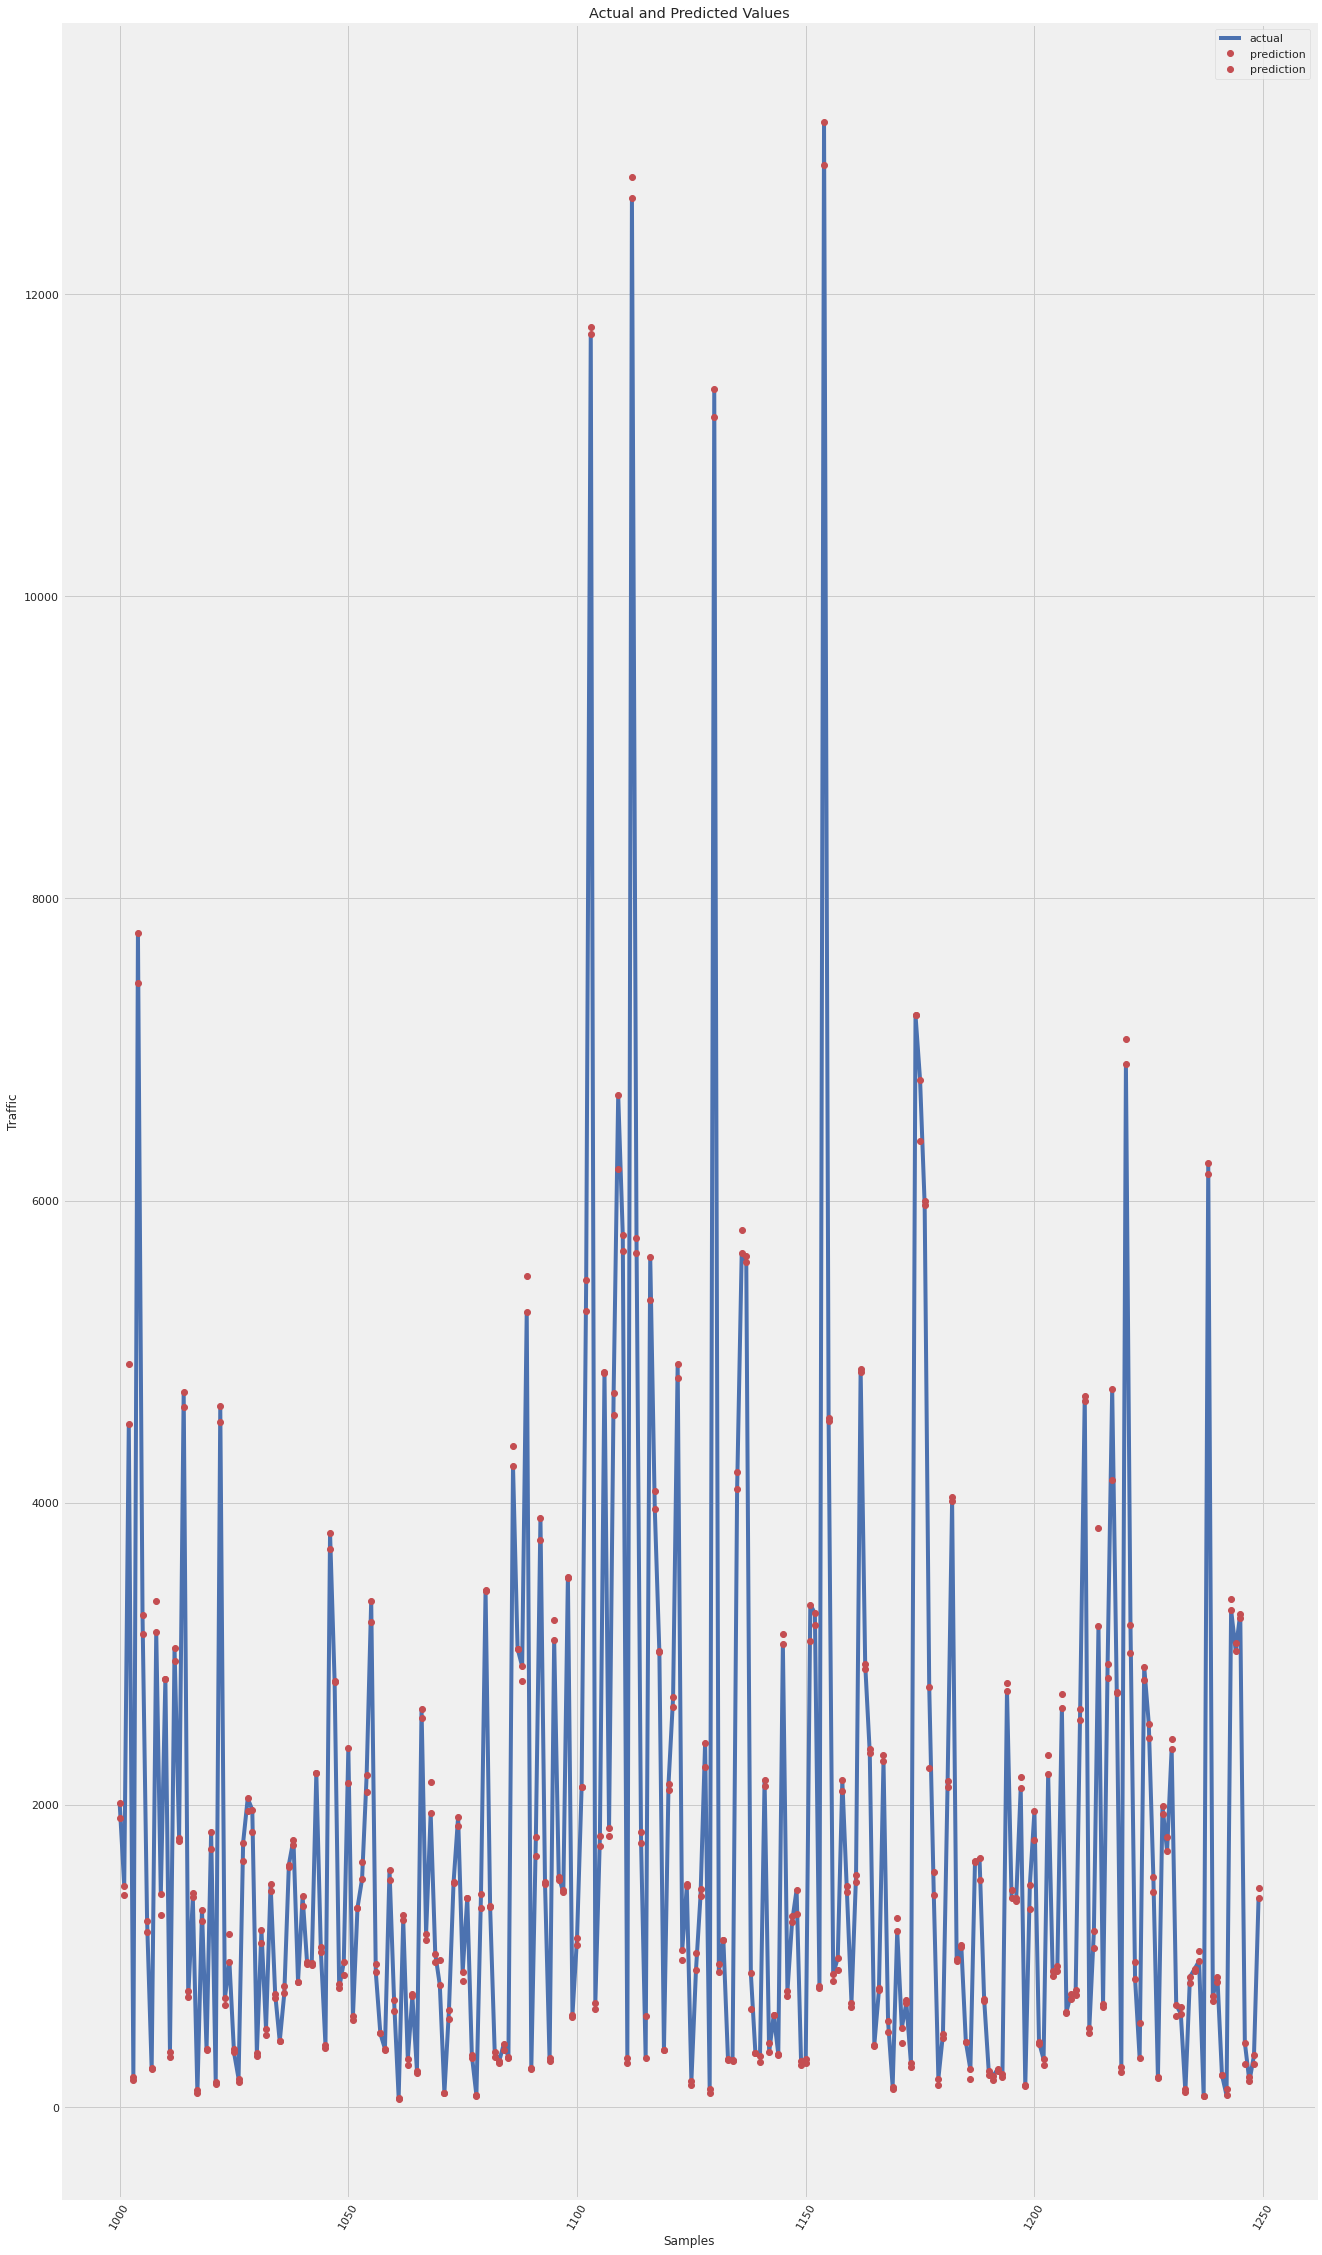

In [53]:
%matplotlib inline

f, ax = plt.subplots(figsize=(20,40)) # set the size that you'd like: width, height

# Plot the actual values
plt.plot(true_data[1000:1250], 'b-', label = 'actual')

# Plot the predicted values
plt.plot(predictions_data[1000:1250], 'ro', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()

# Graph labels
plt.xlabel('Samples'); plt.ylabel('Traffic'); plt.title('Actual and Predicted Values');